### <b> Decision Tree Model using using Age, Race, Sex, and Offense Types as Features <b>

Import Required Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import seaborn as sns

Loading Dataset

In [2]:
data = pd.read_csv(
    r'C:\Users\janie\OneDrive\Desktop\3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_CLEAN.csv')
data

,Fiscal_Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,Return_To_Prison,Recidivism_Type,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype
0,2010,2013,2.0,433,4,7,2,5,5,18,2,1,5,1,25
1,2010,2013,2.0,453,2,10,2,6,3,23,2,3,0,0,0
2,2010,2013,3.0,832,4,10,2,4,1,25,2,3,0,0,0
3,2010,2013,2.0,0,4,10,2,4,2,12,1,2,0,0,0
4,2010,2013,3.0,116,2,7,2,6,5,1,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,1.0,0,6,9,2,5,5,1,1,2,0,0,0
26016,2015,2018,3.0,0,11,10,2,5,5,19,1,2,0,0,0
26017,2015,2018,2.0,0,5,10,1,3,4,24,1,2,0,0,0
26018,2015,2018,2.0,0,10,10,2,6,3,23,1,2,0,0,0


Remove Null from Dataset

In [3]:
data.isnull()

,Fiscal_Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,Return_To_Prison,Recidivism_Type,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26016,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26017,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26018,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data = data.fillna(method='ffill')

In [5]:
data.isnull().any()

Fiscal_Year_Released          False
Recidivism_Reporting_Year     False
Age_At_Release                False
Days_To_Return                False
Release_Type                  False
Race_Ethnicity                False
Sex                           False
Offense_Classification        False
Offense_Type                  False
Offense_Subtype               False
Return_To_Prison              False
Recidivism_Type               False
New_Offense_Classification    False
New_Offense_Type              False
New_Offense_Subtype           False
dtype: bool

In [6]:
data.isnull().sum()

Fiscal_Year_Released          0
Recidivism_Reporting_Year     0
Age_At_Release                0
Days_To_Return                0
Release_Type                  0
Race_Ethnicity                0
Sex                           0
Offense_Classification        0
Offense_Type                  0
Offense_Subtype               0
Return_To_Prison              0
Recidivism_Type               0
New_Offense_Classification    0
New_Offense_Type              0
New_Offense_Subtype           0
dtype: int64

Estimate Correlation Coefficients

In [7]:
pd.options.display.float_format = '{:.4f}'.format
corr_matrix = data.corr()
corr_matrix

,Fiscal_Year_Released,Recidivism_Reporting_Year,Age_At_Release,Days_To_Return,Release_Type,Race_Ethnicity,Sex,Offense_Classification,Offense_Type,Offense_Subtype,Return_To_Prison,Recidivism_Type,New_Offense_Classification,New_Offense_Type,New_Offense_Subtype
Fiscal_Year_Released,1.0000,1.0000,0.0095,0.0401,0.0991,0.0085,-0.0289,0.0272,-0.0240,-0.0219,0.0580,-0.0054,0.1351,0.0987,0.1448
Recidivism_Reporting_Year,1.0000,1.0000,0.0095,0.0401,0.0991,0.0085,-0.0289,0.0272,-0.0240,-0.0219,0.0580,-0.0054,0.1351,0.0987,0.1448
Age_At_Release,0.0095,0.0095,1.0000,-0.0680,0.0148,0.0493,-0.0215,0.0325,-0.0148,0.0345,-0.0895,0.0212,-0.0704,-0.0778,-0.0589
Days_To_Return,0.0401,0.0401,-0.0680,1.0000,0.0429,-0.0029,0.0325,0.0004,-0.0617,0.0159,0.8054,-0.3433,0.6655,0.6400,0.6098
Release_Type,0.0991,0.0991,0.0148,0.0429,1.0000,0.0559,-0.0394,0.0439,-0.0773,0.1226,0.1218,0.1218,0.0280,-0.0154,0.0291
Race_Ethnicity,0.0085,0.0085,0.0493,-0.0029,0.0559,1.0000,-0.0157,0.0054,-0.0277,0.0204,0.0082,0.0105,0.0048,-0.0207,0.0118
Sex,-0.0289,-0.0289,-0.0215,0.0325,-0.0394,-0.0157,1.0000,0.0275,0.0606,-0.0287,0.0338,-0.0465,0.0336,0.0436,0.0116
Offense_Classification,0.0272,0.0272,0.0325,0.0004,0.0439,0.0054,0.0275,1.0000,-0.1177,0.0406,0.0118,0.0348,0.0500,-0.0240,0.0054
Offense_Type,-0.0240,-0.0240,-0.0148,-0.0617,-0.0773,-0.0277,0.0606,-0.1177,1.0000,-0.5122,-0.0780,-0.0314,-0.0747,0.0728,-0.1161
Offense_Subtype,-0.0219,-0.0219,0.0345,0.0159,0.1226,0.0204,-0.0287,0.0406,-0.5122,1.0000,0.0167,0.0533,0.0042,-0.0821,0.1069


In [8]:
corr_matrix['Age_At_Release'].sort_values(ascending=False)

Age_At_Release                1.0000
Race_Ethnicity                0.0493
Offense_Subtype               0.0345
Offense_Classification        0.0325
Recidivism_Type               0.0212
Release_Type                  0.0148
Fiscal_Year_Released          0.0095
Recidivism_Reporting_Year     0.0095
Offense_Type                 -0.0148
Sex                          -0.0215
New_Offense_Subtype          -0.0589
Days_To_Return               -0.0680
New_Offense_Classification   -0.0704
New_Offense_Type             -0.0778
Return_To_Prison             -0.0895
Name: Age_At_Release, dtype: float64

In [9]:
corr_matrix['Sex'].sort_values(ascending=False)

Sex                           1.0000
Offense_Type                  0.0606
New_Offense_Type              0.0436
Return_To_Prison              0.0338
New_Offense_Classification    0.0336
Days_To_Return                0.0325
Offense_Classification        0.0275
New_Offense_Subtype           0.0116
Race_Ethnicity               -0.0157
Age_At_Release               -0.0215
Offense_Subtype              -0.0287
Fiscal_Year_Released         -0.0289
Recidivism_Reporting_Year    -0.0289
Release_Type                 -0.0394
Recidivism_Type              -0.0465
Name: Sex, dtype: float64

In [10]:
corr_matrix['Race_Ethnicity'].sort_values(ascending=False)

Race_Ethnicity                1.0000
Release_Type                  0.0559
Age_At_Release                0.0493
Offense_Subtype               0.0204
New_Offense_Subtype           0.0118
Recidivism_Type               0.0105
Fiscal_Year_Released          0.0085
Recidivism_Reporting_Year     0.0085
Return_To_Prison              0.0082
Offense_Classification        0.0054
New_Offense_Classification    0.0048
Days_To_Return               -0.0029
Sex                          -0.0157
New_Offense_Type             -0.0207
Offense_Type                 -0.0277
Name: Race_Ethnicity, dtype: float64

In [11]:
corr_matrix['Return_To_Prison'].sort_values(ascending=False)

Return_To_Prison              1.0000
Days_To_Return                0.8054
New_Offense_Classification    0.7534
New_Offense_Type              0.7143
New_Offense_Subtype           0.6805
Release_Type                  0.1218
Fiscal_Year_Released          0.0580
Recidivism_Reporting_Year     0.0580
Sex                           0.0338
Offense_Subtype               0.0167
Offense_Classification        0.0118
Race_Ethnicity                0.0082
Offense_Type                 -0.0780
Age_At_Release               -0.0895
Recidivism_Type              -0.2238
Name: Return_To_Prison, dtype: float64

Feature Selection

In [12]:
data.columns

Index(['Fiscal_Year_Released', 'Recidivism_Reporting_Year', 'Age_At_Release',
       'Days_To_Return', 'Release_Type', 'Race_Ethnicity', 'Sex',
       'Offense_Classification', 'Offense_Type', 'Offense_Subtype',
       'Return_To_Prison', 'Recidivism_Type', 'New_Offense_Classification',
       'New_Offense_Type', 'New_Offense_Subtype'],
      dtype='object')

In [13]:
x_feature_cols = ['Age_At_Release', 'Race_Ethnicity', 'Sex',
                  'Offense_Classification', 'Offense_Type', 'Offense_Subtype', 
                  'New_Offense_Classification', 'New_Offense_Type', 'New_Offense_Subtype']
y_feature_cols = ['Return_To_Prison']

x = data[x_feature_cols].astype(float)
y = data[y_feature_cols].astype(float)

Splitting the Dataset

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=5)

Building the Decision Tree Model

In [15]:
model1 = DecisionTreeClassifier(
    criterion='entropy', max_depth=5, random_state=5)
model1 = model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

Model Evaluation

In [16]:
y_test = y_test.values.ravel()

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925249807840123


## Visualizing Decision Trees

In [18]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

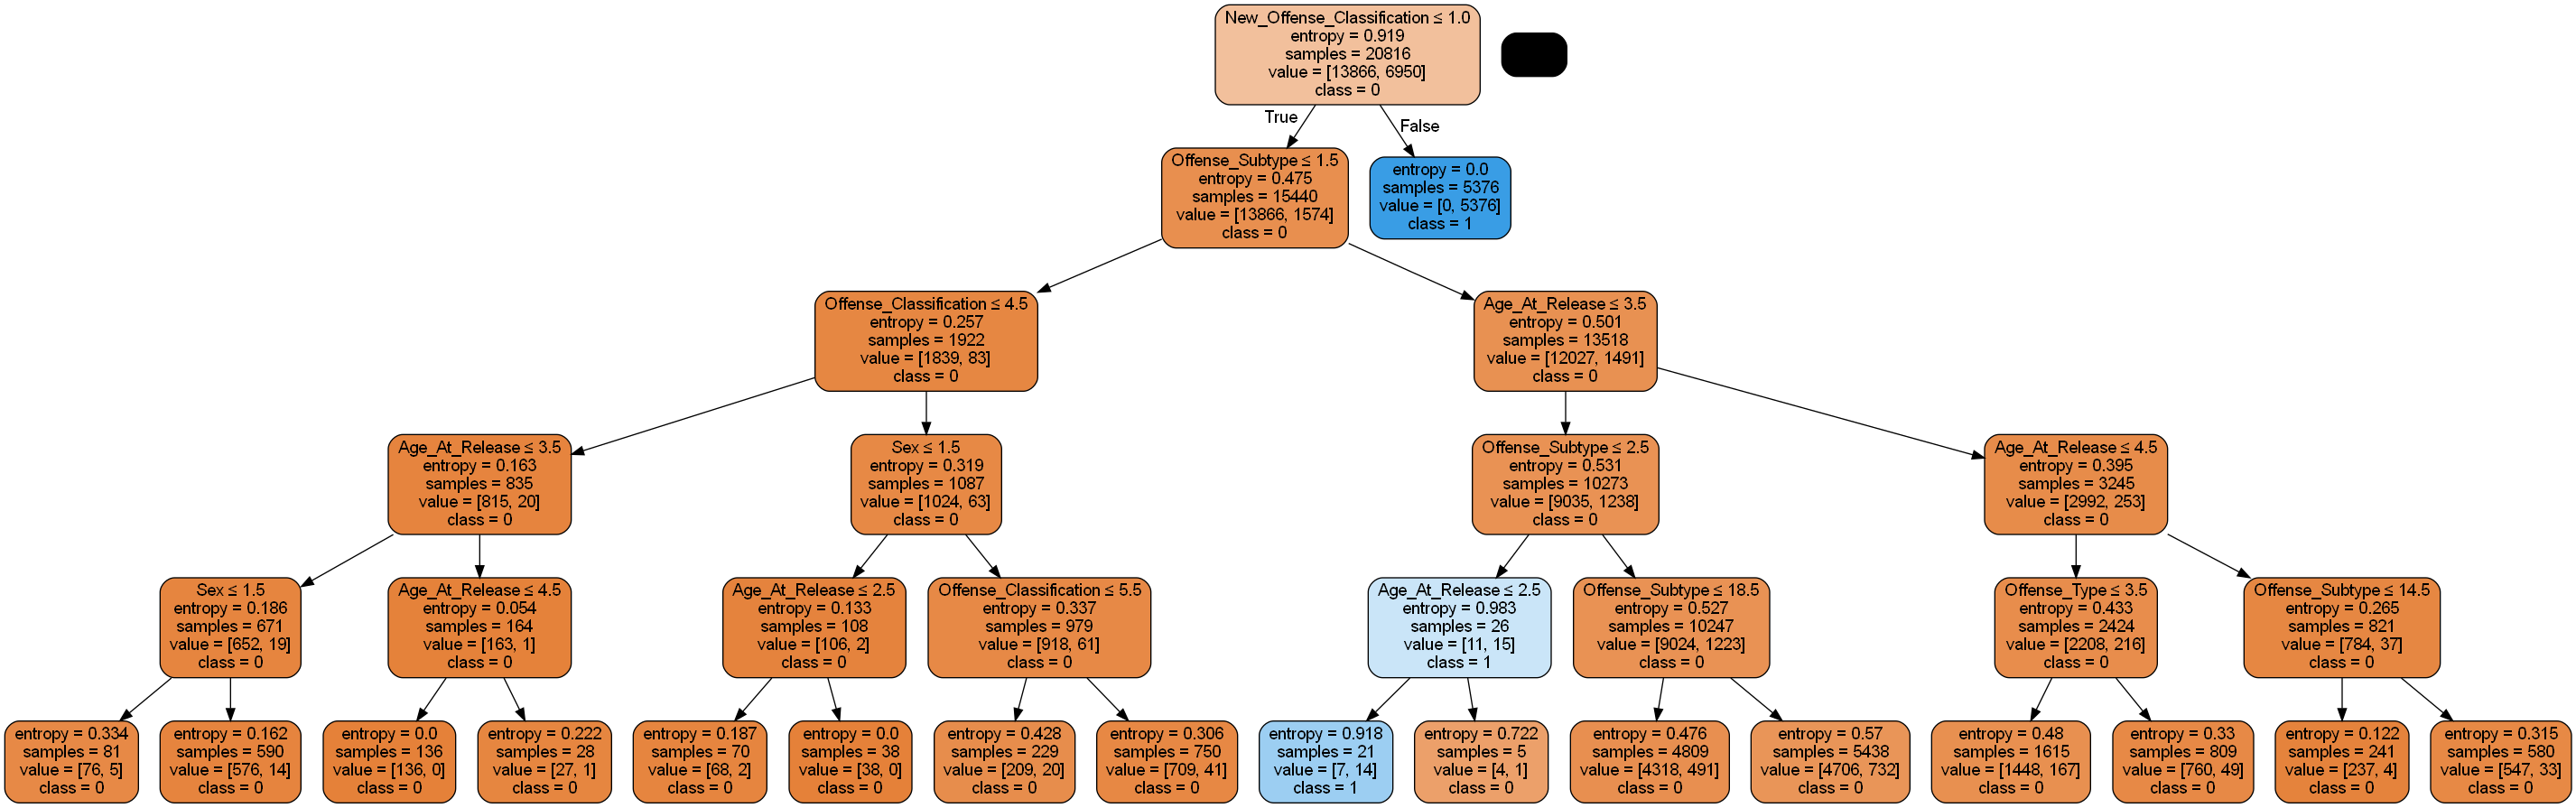

In [19]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model1.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [20]:
model1 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

model1 = model1.fit(x_train,y_train)

y_pred = model1.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.925249807840123


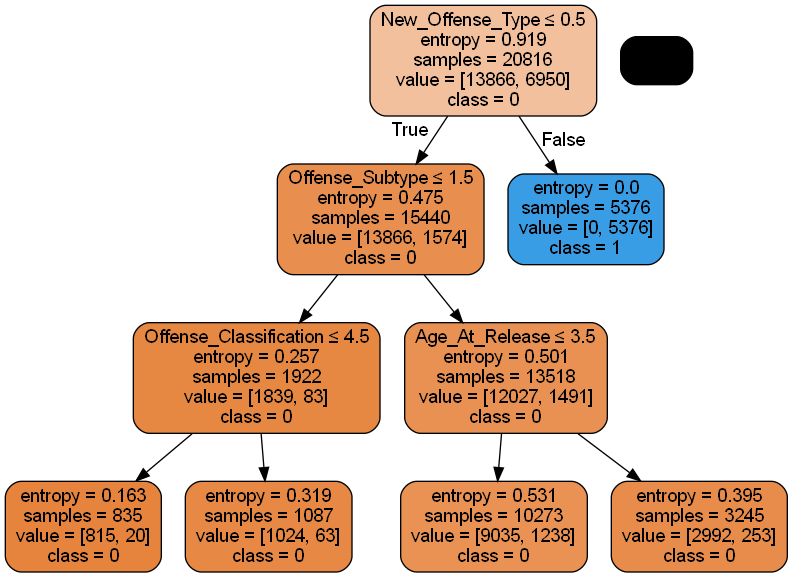

In [21]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model1_2.png')
Image(graph.create_png())

Root Mean Square Error

In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [23]:
from sklearn.metrics import r2_score
print("R2 Score Value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score Value: 0.66


Overfitting vs Underfitting

In [24]:
print("Training set score: {:.4f}".format(model1.score(x_train, y_train)))

Training set score: 0.9244


In [25]:
print("Training set score: {:.4f}".format(model1.score(x_test, y_test)))

Training set score: 0.9252


Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3473    0]
 [ 389 1342]]
